In [2]:
#importando bibliotecas para análise dos dados
import pandas as pd
import numpy as np
import os

In [3]:
#importando bibliotecas de visualização 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [4]:
os.getcwd()

'/Users/danilomedeiros/Documents/Data_Science_DH/Projeto Integrador 1'

In [5]:
#dataset
df = pd.read_csv('./data/Real_State_Properati.csv', sep='\t')

In [6]:
#visualização dos dados
df.head()

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0


In [7]:
df.shape

(17223, 9)

- O conjunto de dados possui 17223 imóveis com 9 variáveis diferentes.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17223 entries, 0 to 17222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17223 non-null  object 
 1   place_name           17223 non-null  object 
 2   country_name         17223 non-null  object 
 3   state_name           17223 non-null  object 
 4   lat                  17223 non-null  float64
 5   lon                  17223 non-null  float64
 6   price                17223 non-null  float64
 7   currency             17223 non-null  object 
 8   surface_total_in_m2  17223 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


Conhecendo a estrutura dos dados, vamos identificar os valores faltantes, presença de outliers, análise de correlações entre as variáveis, dentre outras questões relevantes nesta fase inicial.

In [9]:
#percentual de dados faltante
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

property_type          0.0
place_name             0.0
country_name           0.0
state_name             0.0
lat                    0.0
lon                    0.0
price                  0.0
currency               0.0
surface_total_in_m2    0.0
dtype: float64

 Podemos verificar que nenhuma coluna analisada possui dados faltantes.

In [10]:
df.describe()

,lat,lon,price,surface_total_in_m2
count,17223.000000,17223.000000,1.722300e+04,17223.000000
mean,-34.600541,-58.434354,3.567353e+05,117.989665
std,0.039048,0.055797,1.183132e+06,1534.549462
min,-38.416097,-63.616672,5.500000e+03,0.000000
25%,-34.620026,-58.463026,1.080000e+05,44.000000
50%,-34.600937,-58.434584,1.634760e+05,66.000000
75%,-34.581559,-58.402708,3.000000e+05,116.000000
max,-34.535096,-58.354956,5.000000e+07,200000.000000


In [11]:
df[['price','surface_total_in_m2']].describe()

,price,surface_total_in_m2
count,1.722300e+04,17223.000000
mean,3.567353e+05,117.989665
std,1.183132e+06,1534.549462
min,5.500000e+03,0.000000
25%,1.080000e+05,44.000000
50%,1.634760e+05,66.000000
75%,3.000000e+05,116.000000
max,5.000000e+07,200000.000000


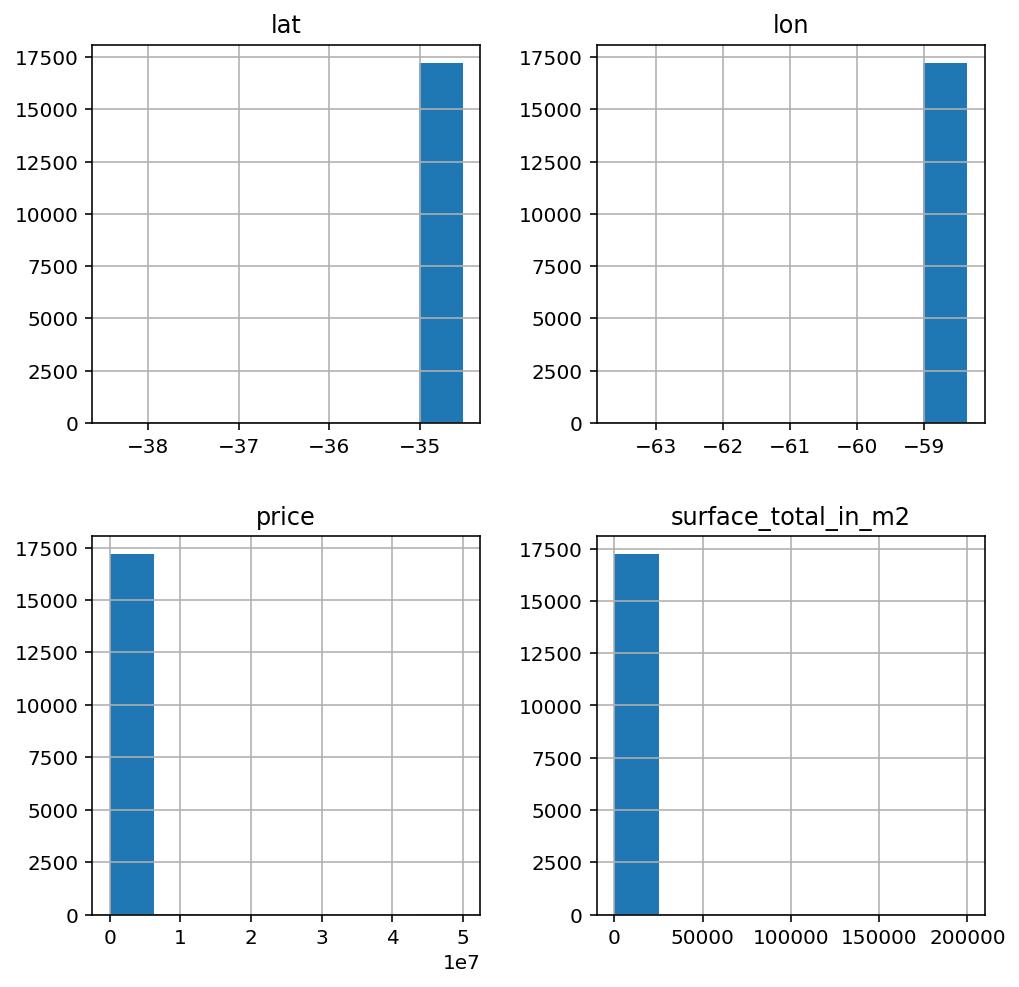

In [12]:
#histogramas das variáveis
df.hist(bins=8, figsize=(8,8));

Podemos verificar através do describe e dos histogramas, que:
   - A variável **price** possui um imóvel com custo 0, por isso precisa-se avaliar.
   - A variável **surface_total_in_m2** possui um máximo de 200 mil m2, por isso precisa-se avaliar.

In [13]:
print(df['currency'].unique())
print(df['country_name'].unique())

['USD' 'ARS']
['Argentina']


In [14]:
#convertendo as linhas com moedas em peso para dólar
dolar = {'USD':1, 'ARS': 0.0085}

df['price_usd'] = df.currency.map(dolar)*df.price

In [15]:
teste = df.currency == 'ARS'
df[teste]

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,price_usd
58,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1099350.0,ARS,27.0,9344.4750
59,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1113420.0,ARS,27.0,9464.0700
60,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1127700.0,ARS,27.0,9585.4500
61,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1141980.0,ARS,27.0,9706.8300
62,apartment,Paternal,Argentina,Capital Federal,-34.603594,-58.465425,1327515.0,ARS,32.0,11283.8775
...,...,...,...,...,...,...,...,...,...,...
16977,apartment,Villa Urquiza,Argentina,Capital Federal,-34.573427,-58.473572,2337233.0,ARS,45.0,19866.4805
17021,apartment,Belgrano,Argentina,Capital Federal,-34.564408,-58.437251,650000.0,ARS,132.0,5525.0000
17113,apartment,Villa Crespo,Argentina,Capital Federal,-34.597679,-58.443019,2960000.0,ARS,53.0,25160.0000
17165,apartment,Coghlan,Argentina,Capital Federal,-34.558708,-58.486731,2651200.0,ARS,70.0,22535.2000


In [16]:
#criando uma nova coluna de preço por metro quadrado
df['price_per_m2'] = df['price_usd'] / df['surface_total_in_m2']

In [17]:
df.head()

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2,price_usd,price_per_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0,62000.0,1127.272727
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0,72000.0,1309.090909
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0,138000.0,3066.666667
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0,195000.0,3000.000000
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0,239000.0,1707.142857


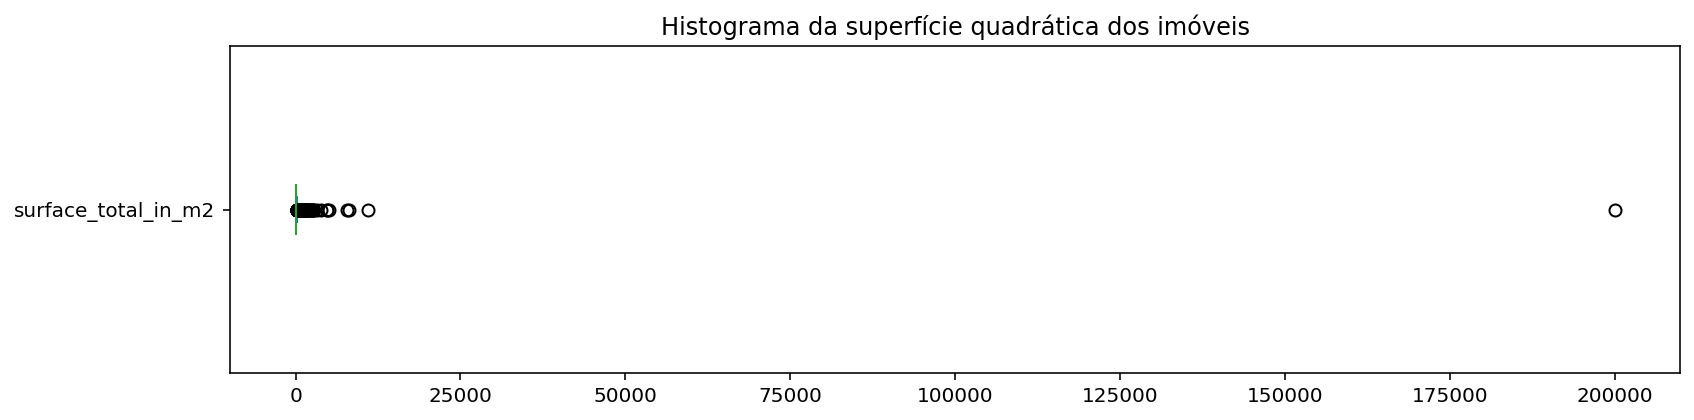

Imóveis acima de 600 metros quadrados
Quantidade = 140 imóveis
Porcentagem = 0.81%


In [18]:
df.surface_total_in_m2.plot(kind='box', vert=False, figsize=(13,3))
plt.title("Histograma da superfície quadrática dos imóveis")
plt.show()

print("Imóveis acima de 600 metros quadrados")
print("Quantidade = {} imóveis".format(len(df[df.surface_total_in_m2 > 600])))
print("Porcentagem = {:.2f}%".format(len(df[df.surface_total_in_m2 > 600]) / df.shape[0]*100))

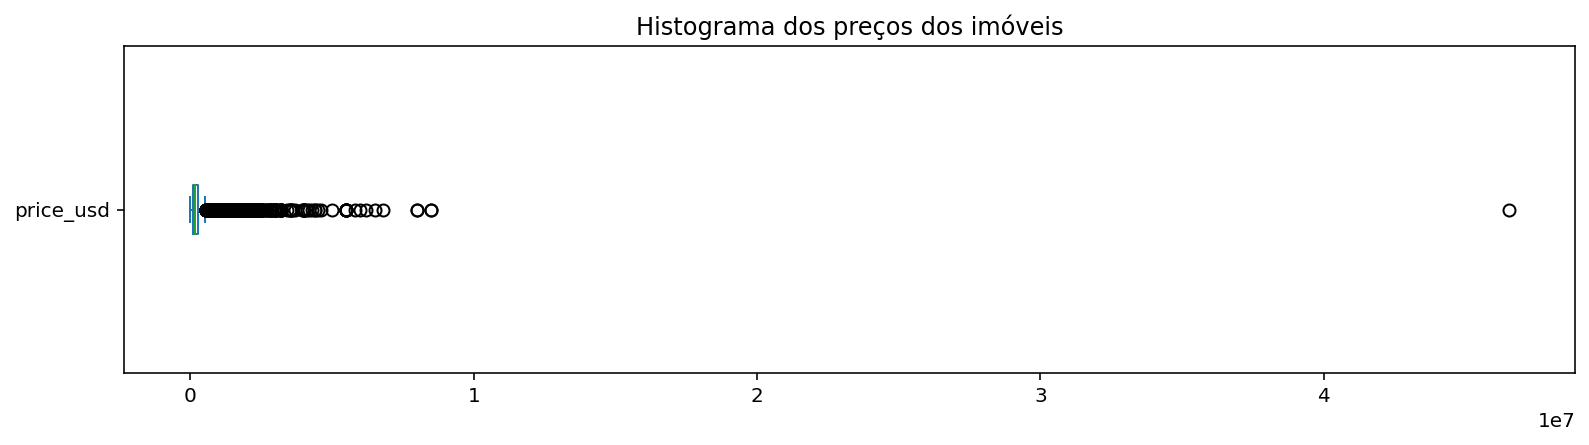

Imóveis acima de 1 milhão de dólares:
Quantidade = 542 imóveis
Porcentagem = 3.15%


In [19]:
df.price_usd.plot(kind='box', vert=False, figsize=(13,3))
plt.title("Histograma dos preços dos imóveis")
plt.show()

print("Imóveis acima de 1 milhão de dólares:")
print("Quantidade = {} imóveis".format(len(df[df.price_usd > 1000000])))
print("Porcentagem = {:.2f}%".format(len(df[df.price_usd > 1000000]) / df.shape[0]*100))

**Pelos Boxplots podemos verificar a suposta presença de outliers:**

- A variável **surface_in_m2** mostra um valor abaixo de 1% de imóveis acima de 600 metros quadrados, sendo um suposto outlier.

- Já na variável **price_usd** mostra também um valor abaixo de 3% de imóveis acima de 1 milhão de dólares, o que pode estar distorcendo nossa análise e sendo também um suposto outlier a tratar.

#### Removendo os outliers para melhorar nossa análise

In [20]:
#Removendo algumas colunas
cols_delete = ['country_name','price','currency']
df = df.drop(cols_delete, axis=1)

In [21]:
#Removendo os outliers
df.drop(df[df.surface_total_in_m2 > 600].index, axis=0, inplace=True)
df.drop(df[df.price_usd > 1000000].index, axis=0, inplace=True)

In [22]:
#df.hist(bins=15, figsize=(15,15));

In [23]:
df.head()

,property_type,place_name,state_name,lat,lon,surface_total_in_m2,price_usd,price_per_m2
0,PH,Mataderos,Capital Federal,-34.661824,-58.508839,55.0,62000.0,1127.272727
1,apartment,Mataderos,Capital Federal,-34.652262,-58.522982,55.0,72000.0,1309.090909
2,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,45.0,138000.0,3066.666667
3,apartment,Belgrano,Capital Federal,-34.559873,-58.443362,65.0,195000.0,3000.000000
4,PH,Mataderos,Capital Federal,-34.652356,-58.501624,140.0,239000.0,1707.142857


<AxesSubplot:>

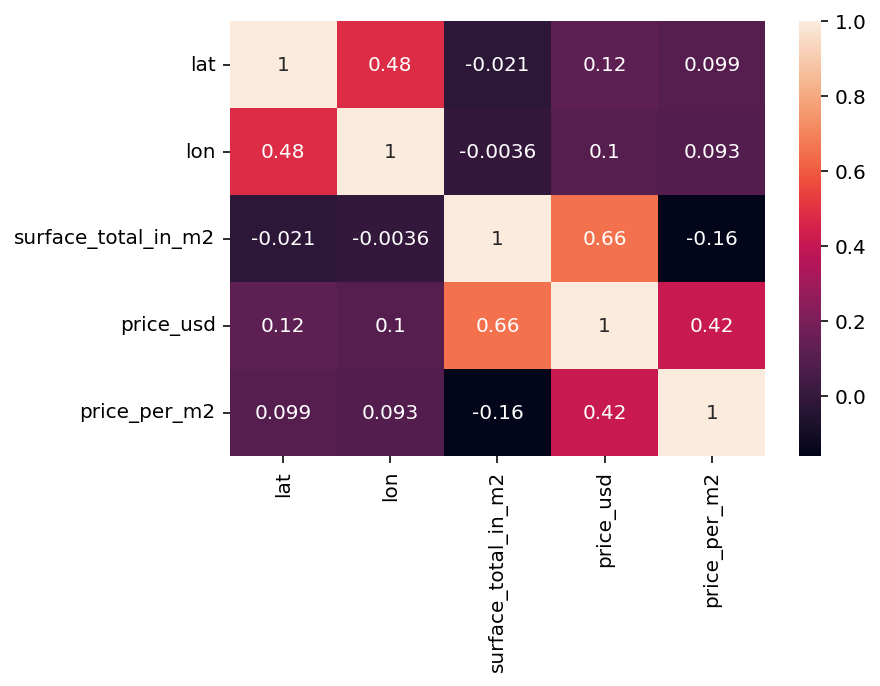

In [24]:
sns.heatmap(df.corr(), annot=True)

**Descoberta Interessante**
- **price_usd** e **surface_total_in_m2** do apartamento têm um índice de correlação pearson de 0.66. O que significa que estão correlacionados, mas ainda sim não muito. Sendo uma série de fatores, como localização, condições, etc que alteram o seu valor.

**Algumas Características categóricas**

Temos uma ideia do preço para cada um dos bairros?

Que tal uma perspectiva mais granular?! Vamos analisar alguns dados relacionados aos endereços.

Quais seriam nossas áreas mais quentes, por exemplo áreas com mais anúncios?

In [25]:
df['place_name'].value_counts().head(40)

Palermo                 1438
Belgrano                1418
Caballito               1385
Recoleta                 934
Flores                   882
Villa Urquiza            774
Villa Crespo             766
Almagro                  749
Barrio Norte             725
San Telmo                562
Balvanera                421
Nuñez                    361
Barracas                 305
Saavedra                 284
Boedo                    275
Floresta                 270
Monserrat                256
Villa Devoto             240
Villa Luro               234
Colegiales               230
Puerto Madero            228
Capital Federal          224
Palermo Hollywood        222
Villa del Parque         215
San Cristobal            207
Mataderos                201
Centro / Microcentro     180
Congreso                 174
Liniers                  173
Coghlan                  169
Constitución             152
Parque Patricios         137
Palermo Soho             132
Retiro                   131
Las Cañitas   

In [26]:
df_popular_locations = df[(df['place_name'].isin(list(df['place_name'].value_counts().head(40).index)))]

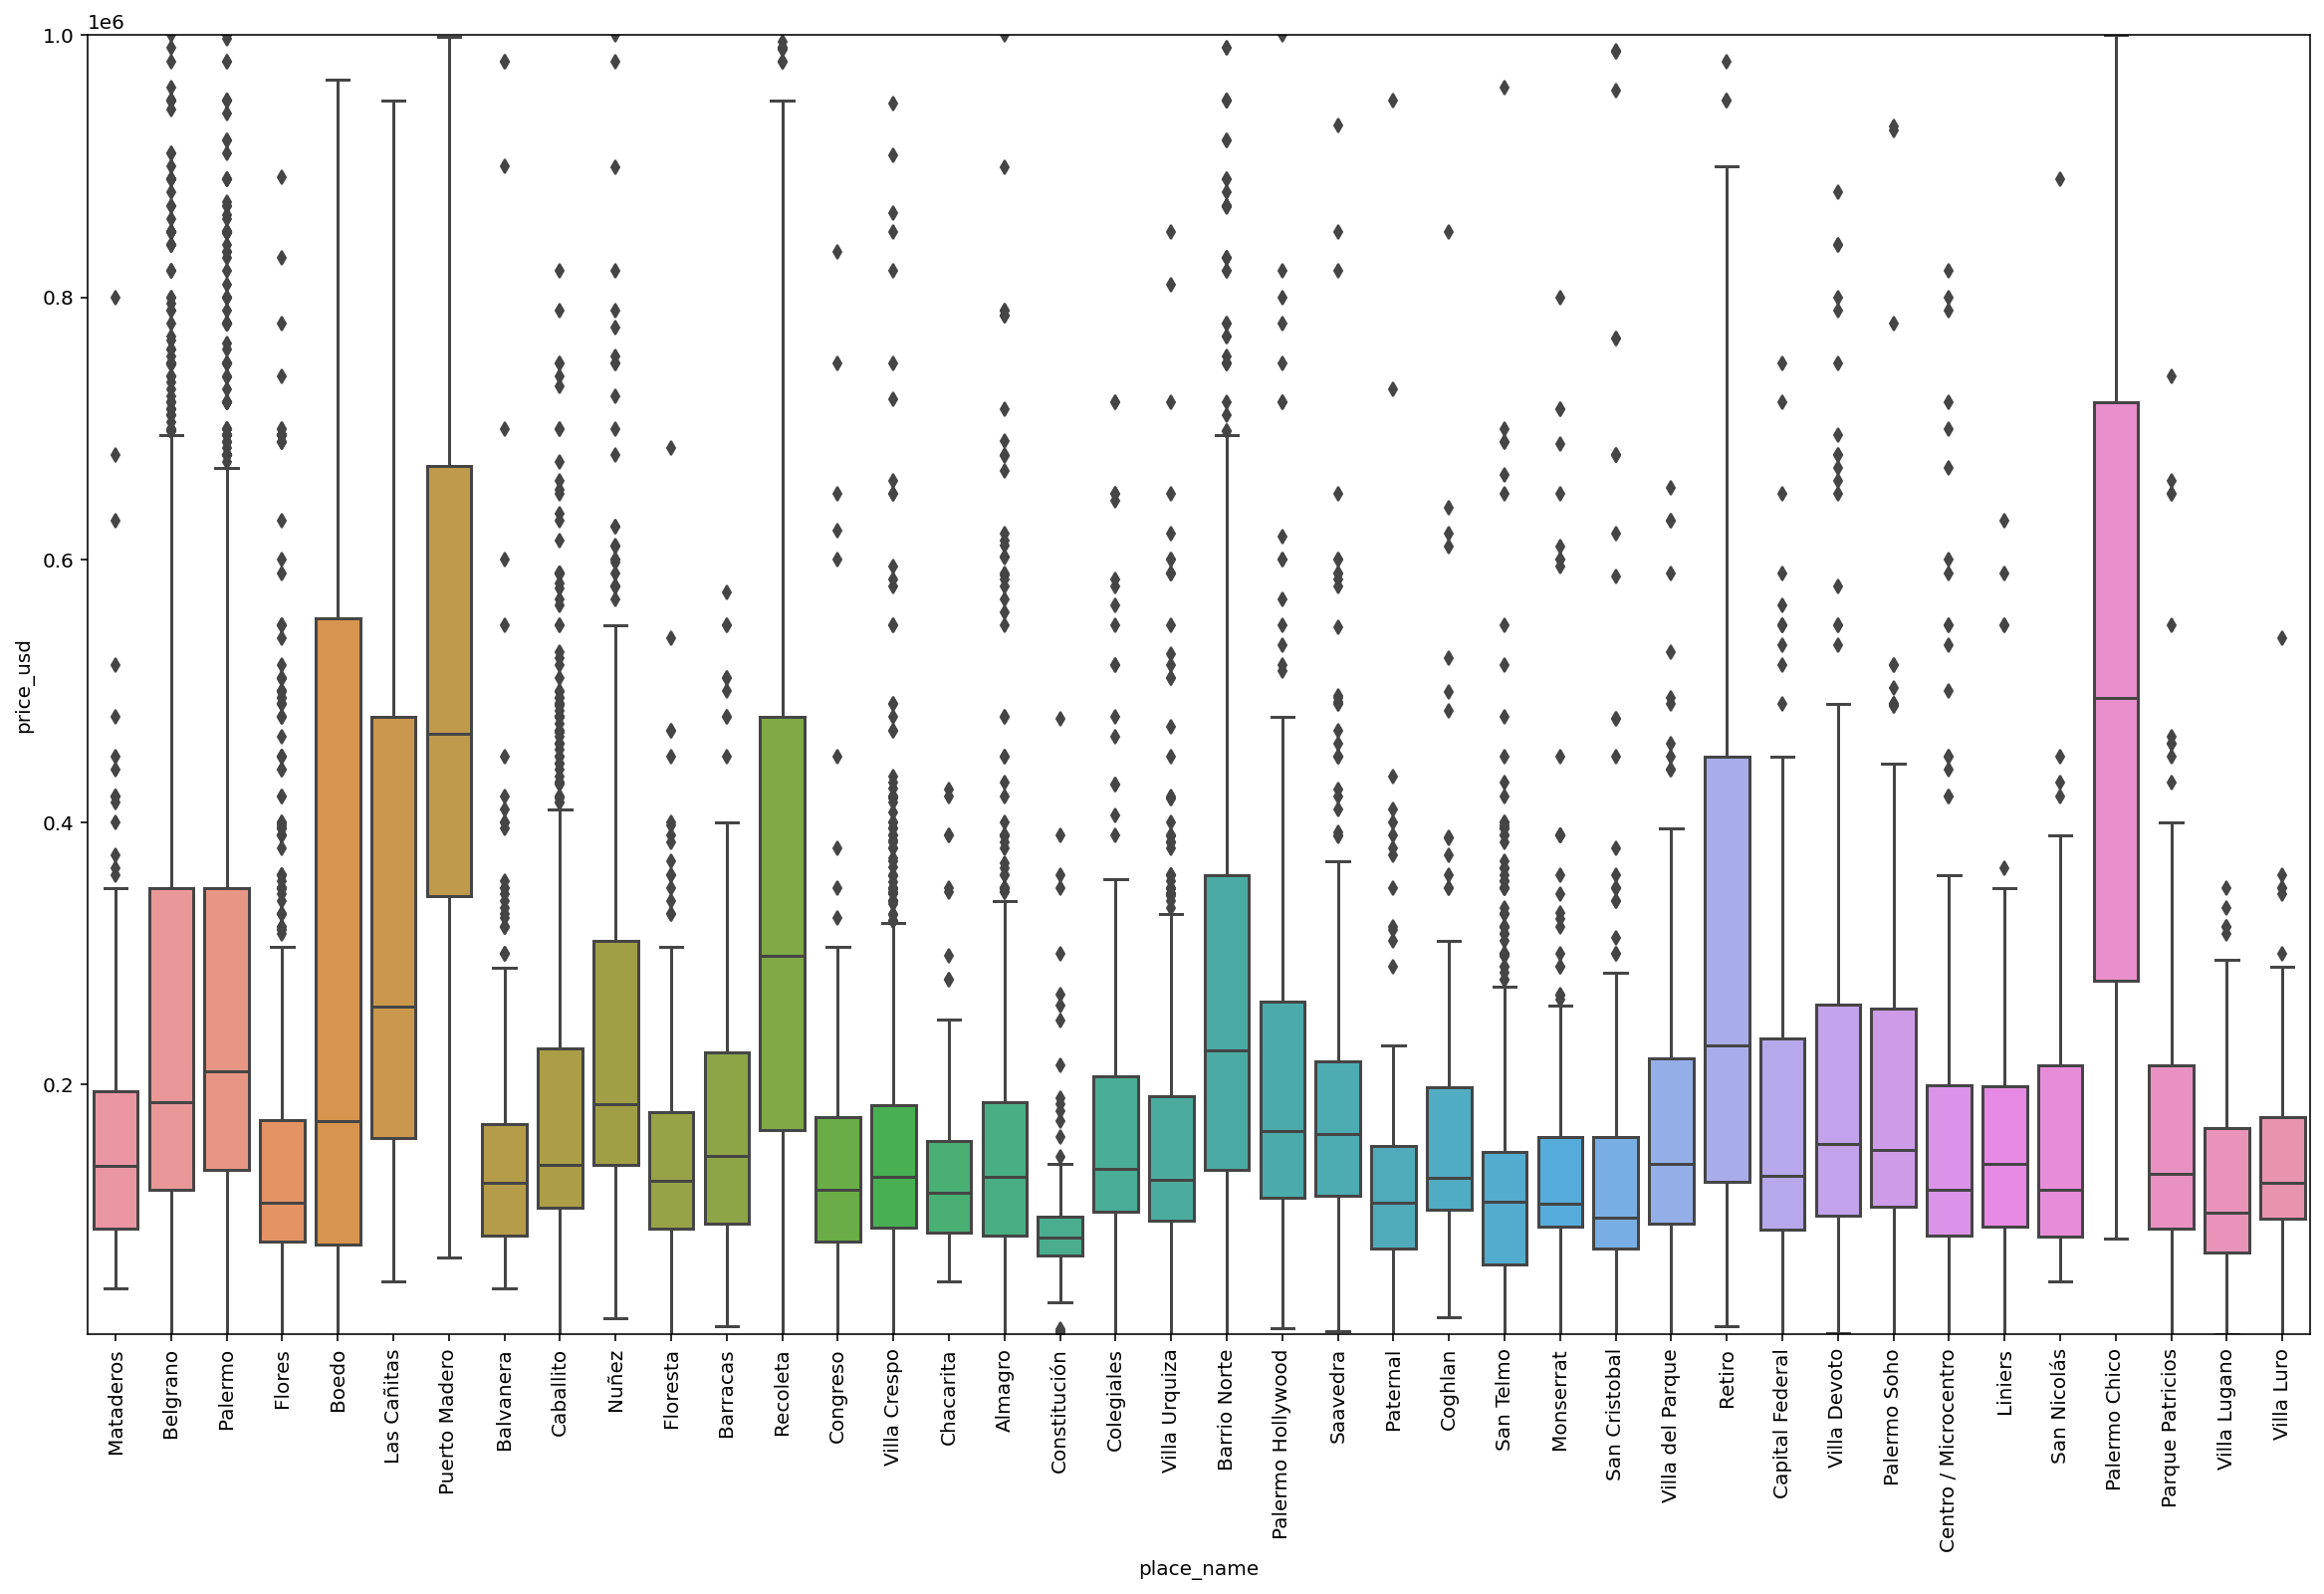

In [27]:
var = 'place_name'
data = pd.concat([df_popular_locations.price_usd, df_popular_locations.loc[:,var]], axis=1)
f, ax = plt.subplots(figsize=(20, 12))
fig = sns.boxplot(x=var, y="price_usd", data=data)
fig.axis(ymin=10000, ymax=1000000);
plt.xticks(rotation=90);

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=10)

In [28]:
# utilizando o Mapbox density heatmap da biblioteca plotly
import plotly.express as px



fig = px.density_mapbox(df, lat='lat', lon='lon', z='price_per_m2', radius=10,
                        center=dict(lat=df.lat.mean(), lon=df.lon.mean()), zoom=11,
                        mapbox_style="stamen-terrain")
fig.show()